# Exploratory Data Analysis 

Exploratory data analysis is.....

Outline
- Imports (required libraries and packages and the dataset)
- Data Exploration
- Descriptive Statistics
- Data structuring
- Writing the clean and structured data to a new csv file in the Data/Clean data folder.


1 Imports

In [1]:
# import numpy, pandas for data manipulation, matplotlib.pyplot for visualization and datatime for handling date related data

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# load the data from the csv file into a dataframe and save it in a variable
# the data is store in the Data/Raw data folder titled Unicorn_companies.csv in this project folder 

unicorns = pd.read_csv(r"..\Data\Raw Data\Unicorn_Companies.csv")

2 Data Exploration

In [3]:
# Display the first 5 rows of the data. this can be achieved by using the .head()

unicorns.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


The .head() (head functiion) gives a preview of how the data looks like. As observed above, the "Data Joined" column represents the date that company became a unicorn (reached 1 billion dollars in valuation) and the " Select Investors" column represent the top investors in the company

In [4]:
# shape of the dataframe (number of rows, number of columns)

unicorns.shape

(1074, 10)

To further understand the data, let's determine the various industries, countries and continents involve present in the dataset.

In [23]:
# display the number of industries in the data

industries = unicorns[['Industry']].groupby('Industry').sum()

industries.shape[0]

15

In [24]:
# display all the industries

industries

""
Industry
Artificial intelligence
Auto & transportation
Consumer & retail
Cybersecurity
Data management & analytics
E-commerce & direct-to-consumer
Edtech
Fintech
Hardware


In [21]:
# we have two different spellings for artificial intelligence, correct it

unicorns['Industry'] = unicorns['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')

In [17]:
# how many unique countries are represented in the data and which country has the highest number of unicorns?

unicorns['Country'].describe()

count              1074
unique               46
top       United States
freq                562
Name: Country, dtype: object

In [19]:
# how many unique continents are represented in the data and which continent has the highest number of unicorns?

unicorns['Continent'].describe()

count              1074
unique                6
top       North America
freq                589
Name: Continent, dtype: object

In [7]:
# get the basic information about the dataset. for examples,the data type and the number of null values for each column, 

unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


3 Descriptive Statistics

In [9]:
# get descriptive statistics
# by default this considers only numeric columns

unicorns.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [25]:
#summarise the most frequent values in the non numeric columns.
unicorns[['Industry','Country', 'City','Continent']].describe()

,Industry,Country,City,Continent
count,1074,1074,1058,1074
unique,15,46,256,6
top,Fintech,United States,San Francisco,North America
freq,224,562,152,589


4. Data structuring

To structure the data, thedatatype for "Date Joined" column is convert from object to datetime. this will enable us to work with date formating.

In [26]:
# use the .to_datetime() to convert the data type of Date Joined to datetime
# update the column with updated values

unicorns['Date Joined'] = pd.to_datetime(unicorns['Date Joined'])

In [27]:
# to confirm that Date joined is now of type datetime, run the line below

unicorns['Date Joined'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1074 entries, 0 to 1073
Series name: Date Joined
Non-Null Count  Dtype         
--------------  -----         
1074 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.5 KB


Create a new column called Year Joined. This will ease to compare the year joined with the year founded

In [28]:
# use the .dt.year to extract the year from "Date Joined"
# add the new column to the dataset.

unicorns['Year Joined'] = unicorns['Date Joined'].dt.year

In [29]:
# use .head to see that the new column has been addes

unicorns.head(2)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012


In [30]:
# next, to ease calculations on the valuation, create another column named 'valuation(billions)' using the existing valuation
# column.

unicorns['Valuation(billions)'] = unicorns['Valuation']

# on the new column created, remove the B and $. this is to obtain the valuation as numbers (int) for further analysis

unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].str.replace('B', '')
unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].str.replace('$', '')

# change the datatype to 'int'

unicorns['Valuation(billions)'] = unicorns['Valuation(billions)'].astype('int')

# display to verify 

unicorns.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions)
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [31]:
unicorns.isnull().sum()

Company                 0
Valuation               0
Date Joined             0
Industry                0
City                   16
Country                 0
Continent               0
Year Founded            0
Funding                 0
Select Investors        1
Year Joined             0
Valuation(billions)     0
dtype: int64

In [32]:
unicorns[unicorns.duplicated(keep='first')]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions)


In [35]:
import seaborn as sn

In [42]:
industry_count= unicorns['Industry'].value_counts().sort_values(ascending=False)

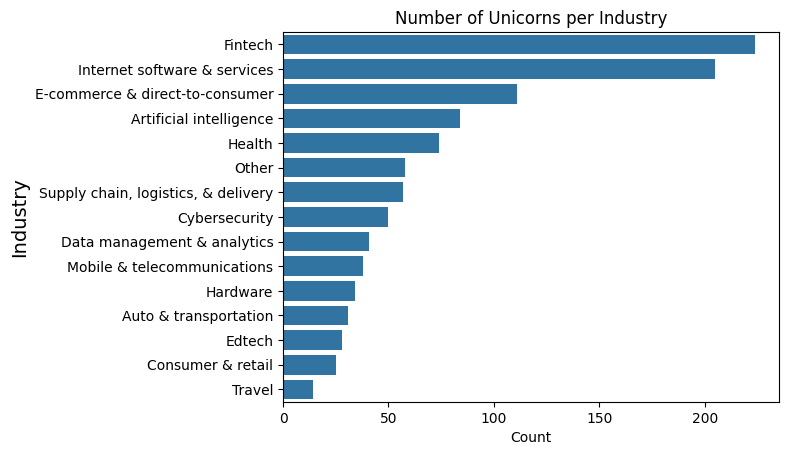

In [49]:
# sort the various industries from highest count to lowest

industry_count= unicorns['Industry'].value_counts().sort_values(ascending=False)

# visualize the industries to see which industries have the most unicorns

sn.countplot(y='Industry', data=unicorns, order=industry_count.index)
plt.title('Number of Unicorns per Industry')
plt.xlabel('Count')
plt.ylabel('Industry', size = 14)
plt.show()

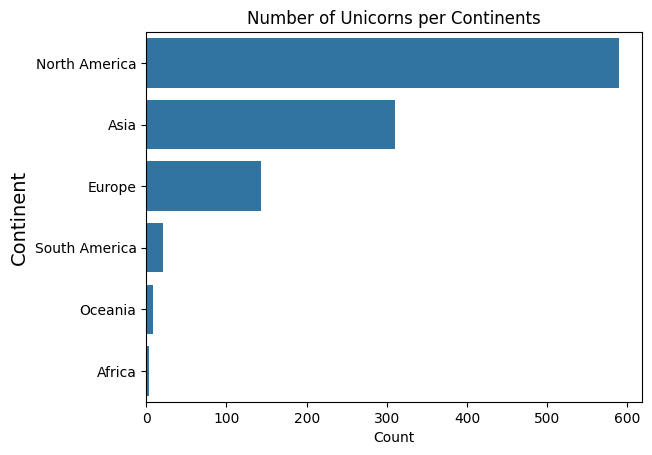

In [48]:
# sort the various continents from highest count to lowest

C_count= unicorns['Continent'].value_counts().sort_values(ascending=False)

# visualize the industries to see which continents have the most unicorns

sn.countplot(y='Continent',data=unicorns, order=C_count.index)
plt.title('Number of Unicorns per Continents')
plt.xlabel('Count')
plt.ylabel('Continent', size = 14)
plt.show()

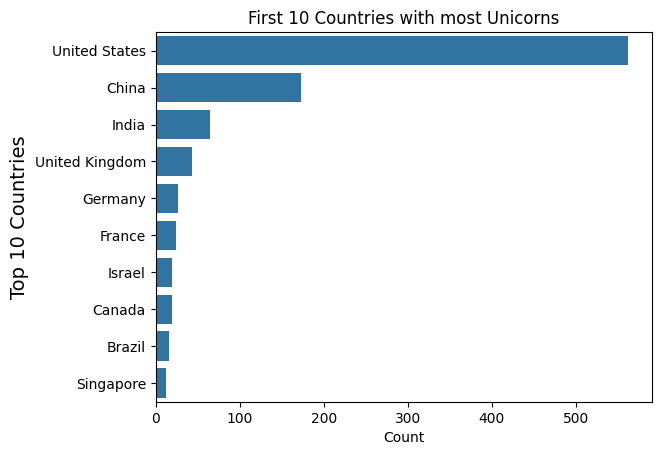

In [53]:
# sort the various Countries from highest count to lowest

C_count= unicorns['Country'].value_counts().sort_values(ascending=False)

# visualize the Results to see which countries have the most unicorns

sn.countplot(y='Country',data=unicorns, order=C_count.index[:10])
plt.title('First 10 Countries with most Unicorns')
plt.xlabel('Count')
plt.ylabel('Top 10 Countries', size = 14)
plt.show()

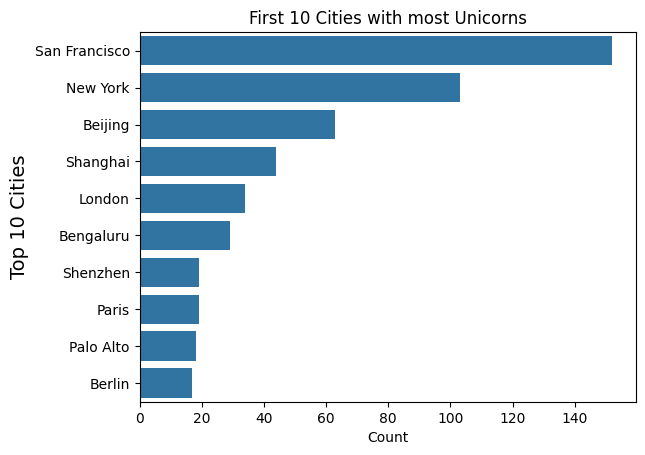

In [56]:
# sort the various Countries from highest count to lowest

C_count= unicorns['City'].value_counts().sort_values(ascending=False)

# visualize the Results to see which countries have the most unicorns

sn.countplot(y='City',data=unicorns, order=C_count.index[:10])
plt.title('First 10 Cities with most Unicorns')
plt.xlabel('Count')
plt.ylabel('Top 10 Cities', size = 14)
plt.show()

In [ ]:
v = unicorns[unicorns['City'] == 'Palo Alto']
v

In [61]:
unicorns.drop(714, inplace=True)

In [63]:
unicorns.drop('Color', axis=1, inplace=True)

5. To wrap up with the EDA process, Save the data to a new csv file which will be used for further analysis in the next notebook. 

In [65]:
# save the data in the Data/Clean data/ folder in the project directory.
# use the .to_csv()

unicorns.to_csv("../Data/Clean data/unicorns.csv", index=False)

# https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4: examplar.

In this notebook, Exploratory Data Analysis was performed to clean, explore and format the data. The cleaned data has also been saved for further analysis.

Refer to the next notebook for further analysis and visualization to answer the specific research questions inorder to communicate findings to stakeholders.